<a href="https://colab.research.google.com/github/Jwaminju/Algorithm_01/blob/main/Python_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_Python_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선 그래프
- 데이터의 trend 확인

히스토그램
- 데이터의 빈도수 분포 확인

막대그래프
- 범주형 자료별 통계랑 확인

원형그래프
- 범주형자료별 비율 확인

산점도
- 두 데이터의 관계 확인

상자그림
- 데이터의 분포를 요약(최대, 최소, 25%, 75%, 중앙값, 이상값)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [6]:
data = sns.load_dataset('titanic')

In [7]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


시각화 분석 과정

1. 데이터 확인
- 전체적인 데이터 구조 및 내용 파악
- 컬럼명 확인
- 행열 개수 확인
- 컬럼별 유형

2. 결측값 확인
- 결측값 확인 및 수정
- 결측값 삭제 또는 대치

3. 데이터 가공
- 시각화를 위한 데이터 수정

4. 데이터 시각화
- 분석 목적에 맞는 차트로 시각화 함

데이터 확인

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
data.shape

(891, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


결측값 확인

In [12]:
data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
data.isnull().sum(1) # 가운데 생략된 것 보려면

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [15]:
null_count = data.isnull().sum(1)
null_count = pd.DataFrame(null_count)
null_count = null_count.sort_values(by=[0]) # 0이란 열을 기준으로 정렬
null_count

,0
445,0
679,0
218,0
224,0
671,0
...,...
773,2
301,2
522,2
766,2


# age는 대치, deck는 삭제

In [16]:
data = data.drop(['deck'], axis=1)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


몇몇 행들의 특징을 보고 대치한다.(성별 평균나이로 대치)

In [17]:
data['age'].mean()

29.69911764705882

In [18]:
female_age = data[data['sex']=='female']['age'].mean()
male_age = data[data['sex']=='male']['age'].mean()

In [19]:
print(female_age, male_age)

27.915708812260537 30.72664459161148


In [20]:
# 한번에 할 수 있는 방법
data.groupby('sex')['age'].mean() 

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [21]:
# data.groupby('sex')['age'].transform('mean') -> 전체 데이터가 바뀜, 따라서 결측치만 바뀌게 해야함

In [22]:
data['age'].fillna(data.groupby('sex')['age'].transform('mean'), inplace = True)

In [23]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,27.915709,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [24]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

시각화
- 전체 생존자, 사망자 비율: 원형그래프
- 전체 생존자, 사망자 수: 막대그래프

In [25]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [26]:
data_new = data.groupby('survived').survived.count()
data_new = pd.DataFrame(data_new)
data_new = data_new.rename_axis('group')
data_new

,survived
group,
0,549
1,342


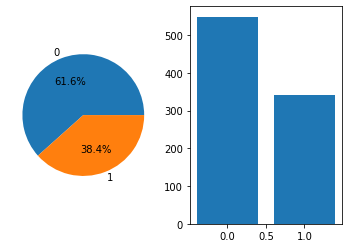

In [27]:
plt.subplot(121)
plt.pie(data_new['survived'], labels = data_new.index, autopct="%1.1f%%")

plt.subplot(122)
plt.bar(data_new.index, data_new['survived'])

plt.show()

전체 생존비율이 38.4%이고, 500명 이상이 사망한 것을 확인할 수 있다

pclass 별 생존자
- 빈부격차 별 생존자 확인

In [28]:
data_new = data.groupby('class').survived.count()
data_new = pd.DataFrame(data_new)
data_new = data_new.rename_axis('group')
data_new

,survived
group,
First,216
Second,184
Third,491


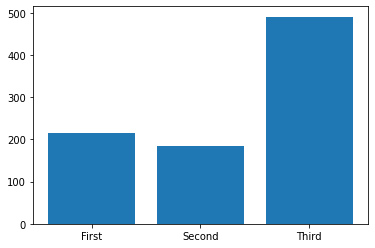

In [29]:
plt.bar(data_new.index, data_new['survived'])

plt.show() # 생존자별로 구분한 값이 아니다.

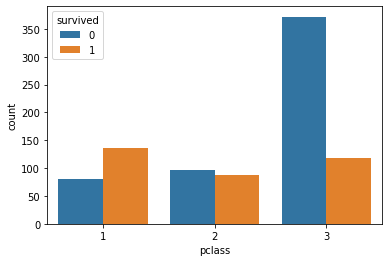

In [30]:
sns.countplot(x='pclass', data = data, hue='survived')
plt.show()

- 모든 컬럼 별 생존자와 사망자 비교
- 막대그래프의 경우 x축에 연속형이 아닌 범주형데이터가 와야함

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


따라서 이 중 int나 float 형은 뺴고 그려야 함

In [32]:
n = len(data.columns)

In [33]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,27.915709,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


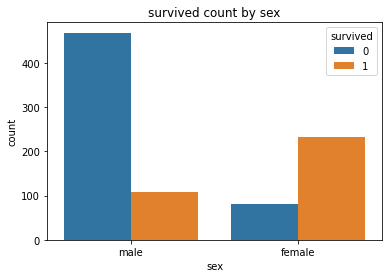

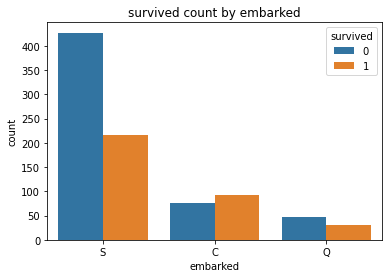

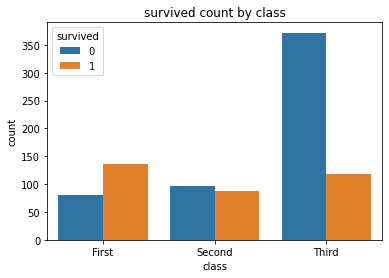

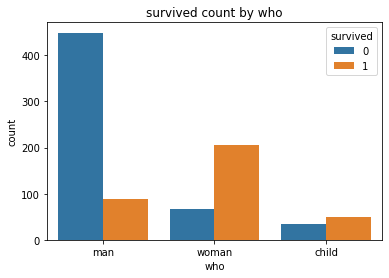

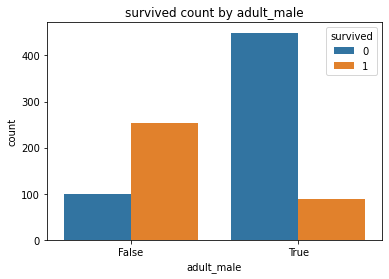

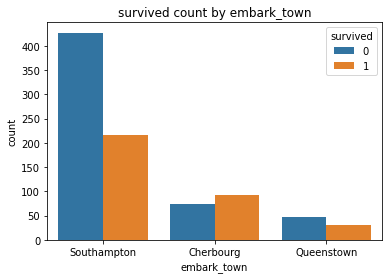

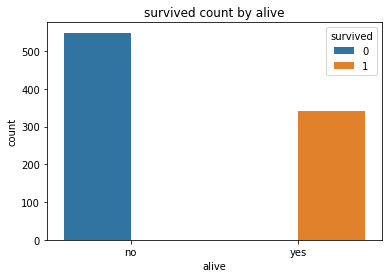

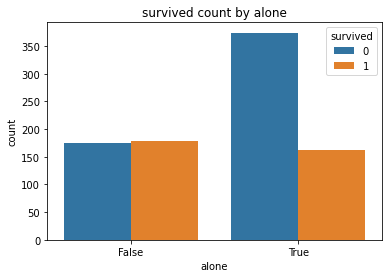

In [44]:
for col in data.columns[0:n]:
  if (str(data.dtypes[col])=='category') or (data[col].dtypes=='object') or (data[col].dtypes=='bool'):
    # category는 리스트 형태라서 다르게 정의
    plt.figure()
    sns.countplot(x=col, data = data, hue='survived')
    plt.title(f'survived count by {col}')

plt.show()
